In [51]:
import pandas as pd
import numpy as np
# For QQPLOT using the below library
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.sample(4)

,Survived,Age,Fare
793,0,NaN,30.6958
517,0,NaN,24.1500
268,1,58.0,153.4625
245,0,44.0,90.0000


In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size=0.2,random_state=42)

C:\Users\Mishra\AppData\Local\Temp\ipykernel_47500\883596550.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare']);
c:\Users\Mishra\Desktop\UserAdmin\ayush\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


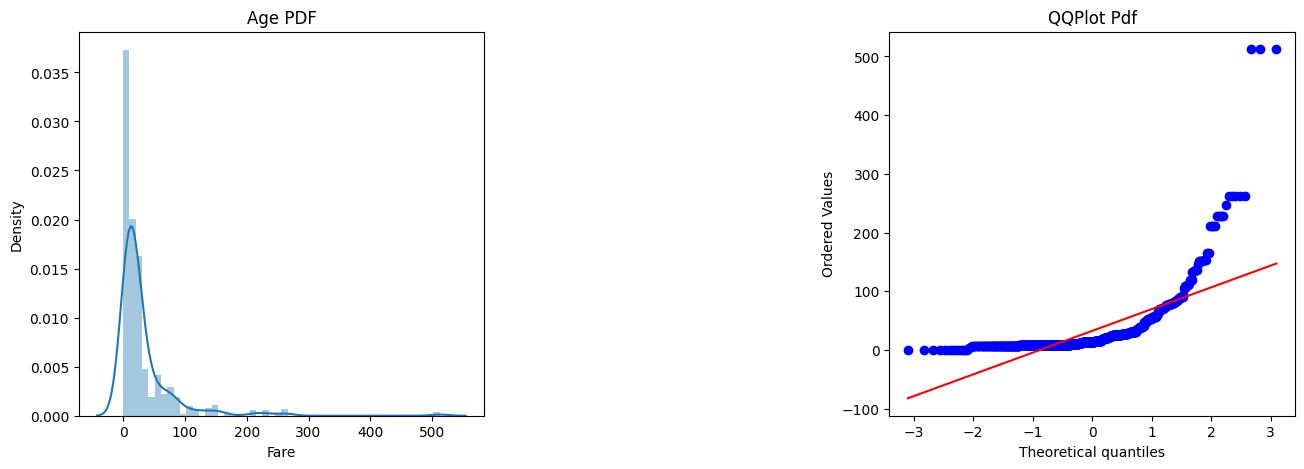

In [45]:
#PDF plot and QQ plot
#fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(X_train['Fare']);
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('QQPlot Pdf')
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1.4)
plt.show()

In [47]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred1 = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

#For finding accuracy score
print("Accuracy score for Logistic Regression",accuracy_score(Y_test,y_pred1))
print("Accuracy score for DecisionTreeClassifier",accuracy_score(Y_test,y_pred2))

Accuracy score for Logistic Regression 0.6480446927374302
Accuracy score for DecisionTreeClassifier 0.664804469273743


#### Power Transformer

In [48]:
df  = pd.read_csv('concrete_data.csv')

In [49]:
df.sample(4)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
923,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28,39.84
35,237.5,237.5,0.0,228.0,0.0,932.0,594.0,270,38.41
880,152.0,0.0,112.0,184.0,8.0,992.0,816.0,28,12.18
311,295.7,0.0,95.6,171.5,8.9,955.1,859.2,28,39.94


In [53]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000
